In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import pandas as pd

from Tool_Functions.cleaning_data import *
from Tool_Functions.join_data import *
from Tool_Functions.test_comportment_reabo import *
from Tool_Functions.visual import *
from Tool_Functions.comportment_reabo import *

path_antoine = "/Users/antoine/Documents/ENSAE2A/Codeperso/everything/Statappperso/Ressources/"
path_results_antoine = "/Users/antoine/Documents/ENSAE2A/Codeperso/everything/Statappperso/Ressources/Results/"

In [9]:
df = file_to_dataframe(path_antoine + 'data_for_klustering.csv')

In [10]:
df

,ID_ABONNE,Autres_n_REABOS,ODD 15 jours EV+_n_REABOS,ODD 15 jours TC_n_REABOS,ODD 21 jours TC_n_REABOS,ODD 30 jours EV+_n_REABOS,ODD 30 jours TC_n_REABOS,ODD 7 jours autre que SG_n_REABOS,PAS_ODD_n_REABOS,Semaine genéreuse_n_REABOS,...,Autres_MEAN_TIME_DIFF,ODD 15 jours EV+_MEAN_TIME_DIFF,ODD 15 jours TC_MEAN_TIME_DIFF,ODD 21 jours TC_MEAN_TIME_DIFF,ODD 30 jours EV+_MEAN_TIME_DIFF,ODD 30 jours TC_MEAN_TIME_DIFF,ODD 7 jours autre que SG_MEAN_TIME_DIFF,PAS_ODD_MEAN_TIME_DIFF,Semaine genéreuse_MEAN_TIME_DIFF,SCORE_FIDELITE
0,50402221602,0,0,1,0,0,2,0,1,0,...,inf,inf,1.750000,inf,inf,-3.250000,inf,4.75,inf,0.153846
1,50402223202,0,0,8,0,0,4,0,0,17,...,inf,inf,0.288793,inf,inf,0.413793,inf,inf,-0.233207,0.743590
2,50402224003,0,0,3,0,0,0,0,0,4,...,inf,inf,0.475857,inf,inf,inf,inf,inf,-0.357143,0.538462
3,50402230202,0,0,9,0,0,3,0,0,6,...,inf,inf,-0.333111,inf,inf,2.888889,inf,inf,-0.944111,0.692308
4,50402230203,0,0,11,1,0,3,0,0,5,...,inf,inf,0.395000,4.85,inf,8.850000,inf,inf,-7.150000,0.769231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780791,53186931901,0,1,1,0,0,0,0,0,1,...,inf,-0.666667,-0.666667,inf,inf,inf,inf,inf,1.333333,0.230769
780792,53186937201,0,1,1,0,0,0,0,0,1,...,inf,-0.666667,-0.666667,inf,inf,inf,inf,inf,1.333333,0.230769
780793,53186971001,0,1,1,0,0,0,0,0,1,...,inf,-0.666667,-0.666667,inf,inf,inf,inf,inf,1.333333,0.230769
780794,53186977101,0,1,1,0,0,0,0,0,1,...,inf,0.333333,0.333333,inf,inf,inf,inf,inf,-0.666667,0.230769


In [26]:
data = file_to_dataframe(path_antoine + 'df_scaled.csv')

In [27]:
data

,Autres_n_REABOS,ODD 15 jours EV+_n_REABOS,ODD 15 jours TC_n_REABOS,ODD 21 jours TC_n_REABOS,ODD 30 jours EV+_n_REABOS,ODD 30 jours TC_n_REABOS,ODD 7 jours autre que SG_n_REABOS,PAS_ODD_n_REABOS,Semaine genéreuse_n_REABOS,PAS_ODD_MEAN_TIME,...,Autres_MEAN_TIME_DIFF,ODD 15 jours EV+_MEAN_TIME_DIFF,ODD 15 jours TC_MEAN_TIME_DIFF,ODD 21 jours TC_MEAN_TIME_DIFF,ODD 30 jours EV+_MEAN_TIME_DIFF,ODD 30 jours TC_MEAN_TIME_DIFF,ODD 7 jours autre que SG_MEAN_TIME_DIFF,PAS_ODD_MEAN_TIME_DIFF,Semaine genéreuse_MEAN_TIME_DIFF,SCORE_FIDELITE
0,-0.272148,-0.558838,-1.296375,-0.601578,-0.686827,1.735324,-0.264239,1.435386,-0.986791,-0.379322,...,NaN,NaN,0.329647,NaN,NaN,-0.160732,NaN,0.356638,NaN,-1.541536
1,-0.272148,-0.558838,0.858677,-0.601578,-0.686827,3.939726,-0.264239,-0.597635,2.163984,NaN,...,NaN,NaN,0.295960,NaN,NaN,-0.104491,NaN,NaN,0.460219,1.551057
2,-0.272148,-0.558838,-0.680646,-0.601578,-0.686827,-0.469079,-0.264239,-0.597635,-0.245432,NaN,...,NaN,NaN,0.300273,NaN,NaN,NaN,NaN,NaN,0.456777,0.475372
3,-0.272148,-0.558838,1.166541,-0.601578,-0.686827,2.837525,-0.264239,-0.597635,0.125247,NaN,...,NaN,NaN,0.281623,NaN,NaN,-0.066498,NaN,NaN,0.440475,1.282136
4,-0.272148,-0.558838,1.782270,0.744330,-0.686827,2.837525,-0.264239,-0.597635,-0.060093,NaN,...,NaN,NaN,0.298409,-1.031155,NaN,0.025007,NaN,NaN,0.268118,1.685517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780791,-0.272148,1.420271,-1.296375,-0.601578,-0.686827,-0.469079,-0.264239,-0.597635,-0.801451,NaN,...,NaN,0.125513,0.273933,NaN,NaN,NaN,NaN,NaN,0.503727,-1.138154
780792,-0.272148,1.420271,-1.296375,-0.601578,-0.686827,-0.469079,-0.264239,-0.597635,-0.801451,NaN,...,NaN,0.125513,0.273933,NaN,NaN,NaN,NaN,NaN,0.503727,-1.138154
780793,-0.272148,1.420271,-1.296375,-0.601578,-0.686827,-0.469079,-0.264239,-0.597635,-0.801451,NaN,...,NaN,0.125513,0.273933,NaN,NaN,NaN,NaN,NaN,0.503727,-1.138154
780794,-0.272148,1.420271,-1.296375,-0.601578,-0.686827,-0.469079,-0.264239,-0.597635,-0.801451,NaN,...,NaN,0.147084,0.296987,NaN,NaN,NaN,NaN,NaN,0.448181,-1.138154


In [28]:
# Séparer la colonne ID_ABONNE
df_id = df[['ID_ABONNE']].copy()

In [29]:
data[np.isnan(data)] = -3

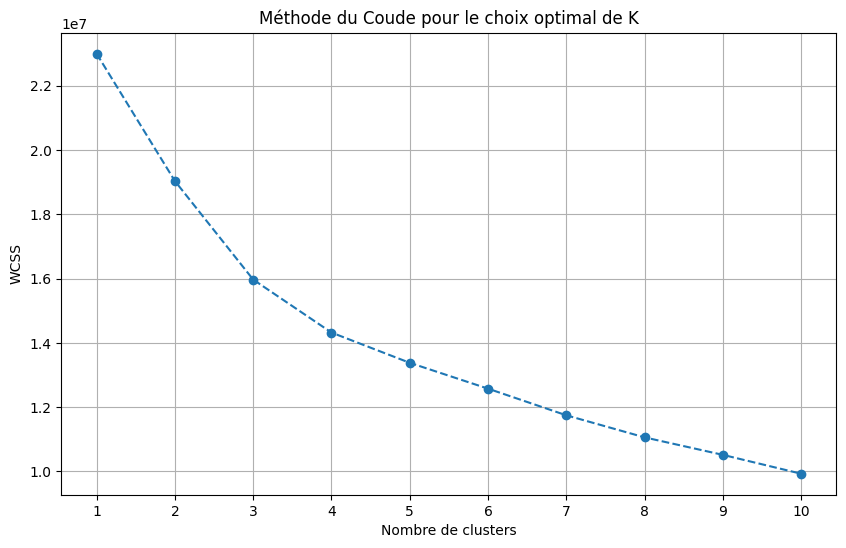

In [30]:
wcss = []
for i in range(1, 11):  # Test de 1 à 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Affichage de la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Méthode du Coude pour le choix optimal de K')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Score calculé pour k = 2


/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Score calculé pour k = 3


/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Score calculé pour k = 4


/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Score calculé pour k = 5


/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Score calculé pour k = 6


/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Score calculé pour k = 7


/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Score calculé pour k = 8


/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Score calculé pour k = 9


/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Score calculé pour k = 10


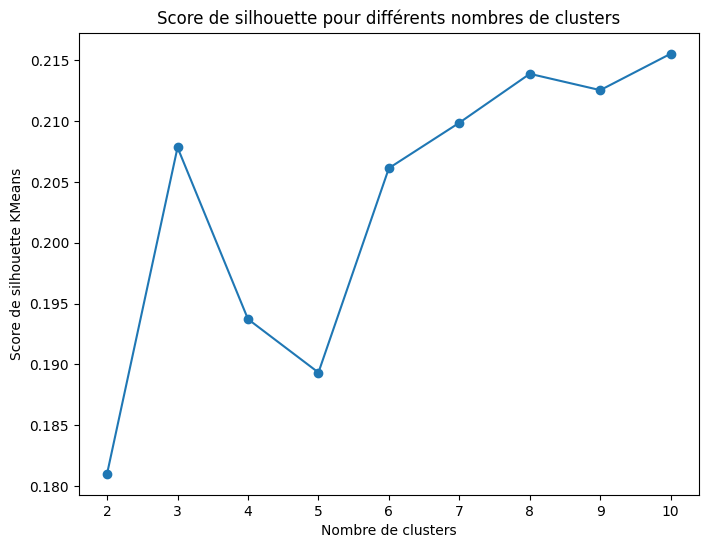

In [31]:
np.random.seed(42)
indices = np.random.choice(range(len(data)), size=int(len(data) * 0.1), replace=False)
sample = data.iloc[indices]
silhouette_scores = []

for k in range(2, 11):  # Testez des valeurs de k de 2 à 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sample)
    score = silhouette_score(sample, kmeans.labels_)
    silhouette_scores.append(score)
    print('Score calculé pour k =', k)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette KMeans')
plt.title('Score de silhouette pour différents nombres de clusters')
plt.show()

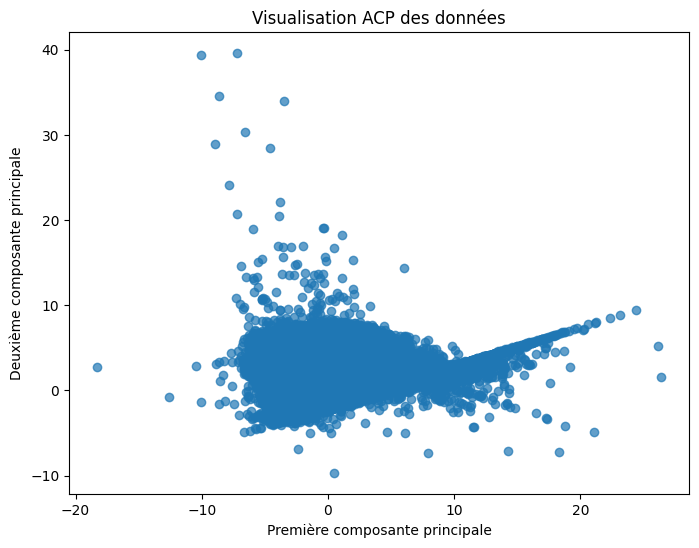

In [32]:
pca = PCA(n_components=2)  # Réduction à 2 dimensions pour la visualisation
df_pca = pca.fit_transform(data)

# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.7)
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Visualisation ACP des données')
plt.show()